# Phase space visualiser

Suppose that we have a differential equation in $x(t)$ and $y(t)$, i.e:

$$
x' = ax + by \\
y' = cx + dy
$$

Or we can write it more concisely with a matrix like $\bold{x}' = A\bold{x}$. This differential equation generates something called a vector field, which we can analyse. Think of the differential equation as a current generator in a wave pool, telling you exactly where you'll be pushed at each point in the plane. We can visuaise these flows in a phase portrait - a graph that allows us to visualise potential solutions to these equations.

We can also visualise divisions in the solution space (that are determined by initial conditions) by looking at the eigenvectors of $A$, these are lines that are invariant in time, i.e lines in real space that have a constant gradient slope!

## We can solve these equations directly

Lets show this by generalising our one dimensional approach, in which we have a given characteristic equation for a differential equation, the solution is always of the form $x = ce^{rt}$. Looking once more at our multidimensional system we can make the assumption that this generalises to higher dimensions.

$$
x' = Ax
$$

Using this assumption we say that $\bold{x} = e^{\lambda t} \bold{v}$, then we have that $\bold{x}' = \lambda e^{\lambda t} \bold{v}$. We can substitute this into the above equation to get: $A\bold{v}e^{\lambda t} = \lambda e^{\lambda t} \bold{v} \iff e^{\lambda t}(A - \lambda \mathbb{I})\bold{v} = 0$, which can only be true when $det(A - \lambda \mathbb{I}) = 0$, thus $\bold{v}$ is an eigenvector of $A$ and $\lambda$ is it's eigenvalue. So solutions to this IVP are determined by linear combinations along invariant trajectories created by the matrix $A$! Depending on the algebraic multiplicity of $\lambda$ (how many times it is repeated), we can have up to two eigenvectors for a two dimensional system, thus the solution will look like this:

$$
\bold{x} = c_1\bold{v}_1e^{\lambda_1 t} + c_2\bold{v}_2e^{\lambda_2 t}
$$

The lines defined by $v$ are invariant and trajectories cannot cross them, their corresponding eigenvalue determines their direction - if we have a negative eigenvalue then all trajectories that begin on the line of $v$ will be pulled into the origin, if the eigenvale is positive they will be pushed away to infinity along the line. This is why we see saddle behaviour when we have one positive and one negative eigenvalue.

In [129]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from typing import Callable

## An example

Consider the system: 

$$
\frac{dy}{dx} = -\frac{x}{y}
$$

This system has a solution of $x^2 + y^2 = c^2$ where $c$ is a constant. We can paramaterise this system with $x(t) = \frac{cos(t)}{c}$ and $y(t) = \frac{sin(t)}{c}$, thus we get the following system of derivatives:

$$
\frac{dy}{dt} = -\frac{sin(t)}{c} = -x \\
\frac{dx}{dt} = \frac{cos(t)}{c} = y
$$

We an imagine these derivatives telling you that if you nudge $t$ forwards by some small amount, $x$ and $y$ change accordingly at their own rates according to the flow generated by the equation! 

### Solving the example analyitically

We can rewrite this system of equations as:

$$
\bold{x}' = \begin{pmatrix}
\ \  \ 0 \  1 \\
-1 \  0 
\end{pmatrix}
\bold{x}
$$

The eigenvalues of this matrix are $i, -i$ - these are complex roots which will lead to spiraling behaviours! The corresponding eigenvectors are:

$$
\begin{pmatrix}
-i \\ 1
\end{pmatrix}, \begin{pmatrix}
i \\ 1
\end{pmatrix}
$$

Thus one solution can be written as:

$$
\bold{x}(t) = \begin{pmatrix}
-i \\ 1
\end{pmatrix}e^{it} + \begin{pmatrix}
i \\ 1
\end{pmatrix}e^{-it} = \begin{pmatrix}
i(sinh(it)) \\
cosh(it)
\end{pmatrix} = \begin{pmatrix}
sin(t) \\ cos(t)
\end{pmatrix}
$$

Which gives us our circle.

### Visualising the example

In [130]:

def solution_co_ordinates(point:np.ndarray, x_derivative: Callable, y_derivative: Callable, time_steps: int) -> None:
    x_i, y_i = point
    xs,ys = [x_i],[y_i]
    dx = 0.01

    for _ in range(time_steps):
        x_i += x_derivative(x_i, y_i) * dx
        y_i += y_derivative(x_i, y_i) * dx
        xs.append(x_i)
        ys.append(y_i)

    return xs,ys

# Create a meshgrid of points that we wish to mark with vectors

x, y = np.meshgrid(np.linspace(-10, 10, 40), np.linspace(-10, 10, 40))

# Define our differential equation for now to be
# dy/dx = -x/y. Then the vector at each point (x, y) will be (x, -x/y)

u = y
v = -x

# Follow the trajectory of the vector field start at (5,5), we want to move slowly up the tangent line

x_i = 1
y_i = 4

xs, ys = solution_co_ordinates(
    np.array([x_i, y_i]),
    x_derivative=lambda x, y: y,
    y_derivative=lambda x, y: -x,
    time_steps=1000,
)

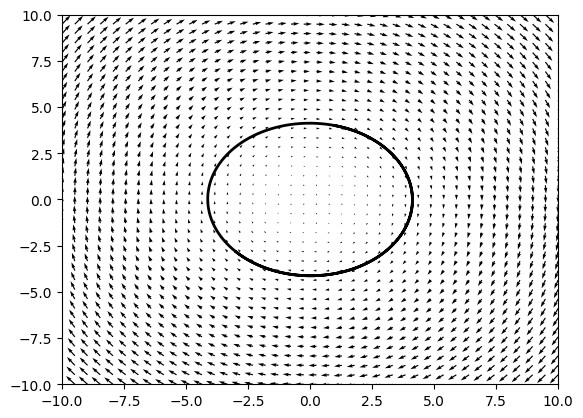

In [128]:
# Create animation to show the flow of the vector field

fig, ax = plt.subplots()
ax.set_ylim(-5, 5)
ax.set_xlim(-5, 5)

ax.quiver(x, y, u, v)

line, = ax.plot(xs, ys, color="k", lw=2)

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([-10, 10, -10, 10])
    return (line,)

anim = animation.FuncAnimation(
    fig,
    update, 
    interval=1, 
    frames=len(xs) ,
    fargs=[xs, ys, line],
    blit = False
)


anim.save("circular_flow.gif")
plt.show()

# Trajectory finder

The ambition here is to create a widget in which you can input equations for $x'$ and $y'$ and click anywhere on a plane of axes to trace a solution.

In [134]:
from typing import Tuple, List

In [135]:
from typing import Tuple, List, Callable

def solution_co_ordinates(
    point: np.ndarray, x_derivative: Callable, y_derivative: Callable, time_steps: int
) -> Tuple[List[float], List[float]]:
    """Traces a solution to a system of differential equations at a given point

    Parameters
    ----------
    point : np.ndarray
        A point from which to trace the solution to the system of differential equations
    x_derivative : Callable
        A function representing the derivative of the x-coordinate
    y_derivative : Callable
        A function representing the derivative of the y-coordinate
    time_steps : int
        The number of time steps to trace the solution

    Returns
    -------
    Tuple[List[float], List[float]]
        A tuple containing two lists, the x and y coordinates of the solution
    """
    x_i, y_i = point
    xs, ys = [x_i], [y_i]
    dx = 0.01

    for _ in range(time_steps):
        x_i += x_derivative(x_i, y_i) * dx
        y_i += y_derivative(x_i, y_i) * dx
        xs.append(x_i)
        ys.append(y_i)

    return xs, ys

In [153]:
grades = {
    1: [70,71,77,89,87,84],
    2: [86,79,77,79,82,84],
    3: [81,70,83,92,83,83]
}

In [154]:
import numpy as np

for year, grade in grades.items():
    print(
        f"Year: {year}\nAverage grade: {np.mean(grade):.2f}%\nGrade standard deviation: {np.std(grade):.2f}%\nMedian grade: {np.median(grade):.2f}%\nInterquartile range: {np.percentile(grade, 75) - np.percentile(grade, 25):.2f}%\n"
        )

print(f"Average grade for all years: {np.mean([grade for year, grade in grades.items() for grade in grade]):.2f}%")

Year: 1
Average grade: 79.67%
Grade standard deviation: 7.48%
Median grade: 80.50%
Interquartile range: 13.75%

Year: 2
Average grade: 81.17%
Grade standard deviation: 3.13%
Median grade: 80.50%
Interquartile range: 4.50%

Year: 3
Average grade: 82.00%
Grade standard deviation: 6.43%
Median grade: 83.00%
Interquartile range: 1.50%

Average grade for all years: 80.94%
